# Lab 3


In [1]:
"""
Created by:  Charity Grey (2025)
Modified by:  [Your Name] (2025)
"""


# Install required packages if needed
# !pip install SimpleITK
from tcia_utils import nbia
import pandas as pd
import SimpleITK as sitk
import numpy as np
import os
import matplotlib.pyplot as plt

### DICOM

DICOM is Digital Imaging and Communications in Medicine — is the international standard for medical images and related information
- OPTIONAL 10 min video: just for ur knowledge https://www.youtube.com/watch?v=-c9KhcGYTG4 

### Visit The Cancer Imaging Archive (TCIA)
Skim this: https://www.cancerimagingarchive.net/browse-collections/ 

#### Download the data using their web API

Q: What is an API? Watch this 3 min video to understand:
https://www.youtube.com/watch?v=-0MmWEYR2a8 

Ans: An application programming interface is a connection between computers or between computer programs. It is a type of software interface, offering a service to other pieces of software


#### How to use APIs? 

- In bioinformatics, a lot of APIs are used for downloading and accessing data
- Each api is different, but you always make some sort of a request. ie: in English, the request "Where" tells you the answer you want is a location.

How you format your request can achieved via reading documention for that API.

Our reference documentation here:
- https://wiki.cancerimagingarchive.net/display/Public/TCIA+Programmatic+Interface+%28REST+API%29+Usage+Guide+v2 
- if you would like to follow their optional tutorial: https://github.com/kirbyju/TCIA_Notebooks/blob/main/TCGA/TCGA_Clinical.ipynb 


Fortunately for us, the TCIA also has a python library that basically has functions that access these apis directly. So we will be doing that.

### YOU ARE NOT EXPECTED TO REPRODUCE THIS. JUST READ IT AND FOLLOW ALONG AS YOU RUN THE CELLS

The reason why is because sometimes, bioinformatics processes are NOT just about analysis. It's also about getting the data and cleaning it/manipulating it to be in the right format for analysis
- this is called data engineering (data wrangling if you are more in data science)

In [3]:

# we are going to get list of all the image collections from the TCIA api
collections_json = nbia.getCollections()
print(str(len(collections_json)) + " collections were found.")
collections = [item['Collection'] for item in collections_json]
print('Collections: ', collections)
collections = ['PROSTATE-DIAGNOSIS']

# What is a nbia series?
# Ans: its just a description of the datasets available
series_df = nbia.getSeries(collections[0], format="df")

print("Series DataFrame shape:", series_df.shape)
series_df.head(1) 

2025-10-14 08:49:42,034:INFO:Calling getCollectionValues with parameters {}
2025-10-14 08:49:57,796:INFO:Calling getSeries with parameters {'Collection': 'PROSTATE-DIAGNOSIS'}


149 collections were found.
Collections:  ['4D-Lung', 'A091105', 'ACNS0332', 'ACRIN-6698', 'ACRIN-Contralateral-Breast-MR', 'ACRIN-FLT-Breast', 'ACRIN-HNSCC-FDG-PET-CT', 'ACRIN-NSCLC-FDG-PET', 'AHEP0731', 'AHOD0831', 'ARAR0331', 'AREN0532', 'AREN0533', 'AREN0534', 'Adrenal-ACC-Ki67-Seg', 'Advanced-MRI-Breast-Lesions', 'Anti-PD-1_Lung', 'B-mode-and-CEUS-Liver', 'BREAST-DIAGNOSIS', 'Breast-Cancer-Screening-DBT', 'Breast-MRI-NACT-Pilot', 'C4KC-KiTS', 'CALGB50303', 'CBIS-DDSM', 'CC-Radiomics-Phantom', 'CC-Radiomics-Phantom-2', 'CC-Radiomics-Phantom-3', 'CC-Tumor-Heterogeneity', 'CMB-AML', 'CMB-BRCA', 'CMB-CRC', 'CMB-GEC', 'CMB-LCA', 'CMB-MEL', 'CMB-MML', 'CMB-OV', 'CMB-PCA', 'CMMD', 'COVID-19-AR', 'COVID-19-NY-SBU', 'CPTAC-AML', 'CPTAC-CCRCC', 'CPTAC-CM', 'CPTAC-LSCC', 'CPTAC-LUAD', 'CPTAC-PDA', 'CPTAC-SAR', 'CPTAC-UCEC', 'CT COLONOGRAPHY', 'CT Lymph Nodes', 'CT-Phantom4Radiomics', 'CT-vs-PET-Ventilation-Imaging', 'CT4Harmonization-Multicentric', 'CTpred-Sunitinib-panNET', 'Colorectal-Live

,SeriesInstanceUID,StudyInstanceUID,Modality,ProtocolName,SeriesDate,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,PatientID,...,ImageCount,TimeStamp,LicenseName,LicenseURI,CollectionURI,FileSize,DateReleased,StudyDesc,StudyDate,ThirdPartyAnalysis
0,1.3.6.1.4.1.14519.5.2.1.4792.2002.115178120278...,1.3.6.1.4.1.14519.5.2.1.4792.2002.269119633629...,MR,T2W_TSE_COR SENSE,2008-09-23 00:00:00.0,T2W_TSE_COR,PROSTATE,401,PROSTATE-DIAGNOSIS,ProstateDx-01-0001,...,24,2012-03-12 10:19:02.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.FOQEUJVT,3229344,2013-01-30 00:00:00.0,MRI PROSTATE WITH AND WITHOUT CONTRAST,2008-09-23 00:00:00.0,NaN


In [4]:
try:
    series_uid = series_df['SeriesInstanceUID'].iloc[0]
    bodyPart = series_df['BodyPartExamined'].iloc[0] 
    print(f"\nAttempting to download series for body part - {bodyPart}: {series_uid}")
    
    # Download with more specific parameters
    nbia.downloadSeries(
        [series_uid], 
        number=1, 
        input_type="list",
        path="./downloads"  # TODO: Specify download directory, rename this env to not interfere with other people's work
    )
    print("Download completed successfully!")
    
except Exception as e:
    print(f"Download failed: {e}")

2025-10-14 08:50:49,254:INFO:Directory './downloads' created successfully.
2025-10-14 08:50:49,256:INFO:Found 0 previously downloaded series.
2025-10-14 08:50:49,257:INFO:Attempting to download 1 new series.
2025-10-14 08:50:49,261:INFO:Downloading... https://services.cancerimagingarchive.net/nbia-api/services/v2/getImage?NewFileNames=Yes&SeriesInstanceUID=1.3.6.1.4.1.14519.5.2.1.4792.2002.115178120278427420002997506613



Attempting to download series for body part - PROSTATE: 1.3.6.1.4.1.14519.5.2.1.4792.2002.115178120278427420002997506613


2025-10-14 08:53:27,620:INFO:Downloaded 1 out of 1 targeted series.
0 failed to download.
0 were previously downloaded.


Download completed successfully!


## 1. Loading Images with SimpleITK

In [7]:
# Method 1: Read a single DICOM file
try:
    # Load a single DICOM file
    folderpath = "./downloads/1.3.6.1.4.1.14519.5.2.1.4792.2002.115178120278427420002997506613/" #TODO replace with path of where you downloaded to
    image_path = f'{folderpath}1-01.dcm'  # Update with your image path
    image = sitk.ReadImage(image_path)
    print('Single DICOM Image size:', image.GetSize())
    print('Image spacing:', image.GetSpacing())
except:
    print("Single DICOM file not found")


Single DICOM Image size: (256, 256, 1)
Image spacing: (0.703125, 0.703125, 3.0)


In [11]:
# The following line will fail. Why?
# Ans: 
# SimpleITK has a build in Show method which saves the image to disk and launches a user configurable program ( defaults to ImageJ ), to display the image.
# We did not download the user configurable program, so it doesn't work.

sitk.Show(image, title="image 1")

RuntimeError: Exception thrown in SimpleITK Show: D:\a\SimpleITK\SimpleITK\Code\IO\src\sitkImageViewer.cxx:758:
sitk::ERROR: No ImageJ/Fiji application found.

TypeError: Invalid shape (1, 256, 256) for image data

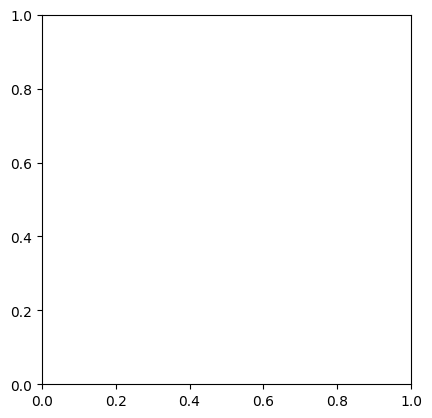

In [12]:
nda = sitk.GetArrayFromImage(image)
# The following line will also fail. Why?
# Ans: the image dimensions are being read via imshow as  x,y, but the nda image is in the dimensions (z,x,y)
# You can figure this out because the error message says "invalid shape"

plt.imshow(nda)

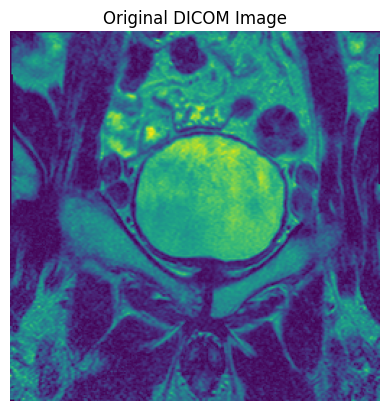

Image shape: (256, 256)
Image dtype: float64
Image min/max: 0.0/2243.809523809523


In [14]:
# Try this line:
plt.imshow(np.squeeze(nda)) 
plt.title('Original DICOM Image')
plt.axis('off')
plt.show()

# Get the squeezed array for further processing
img_array = np.squeeze(nda)
print(f"Image shape: {img_array.shape}")
print(f"Image dtype: {img_array.dtype}")
print(f"Image min/max: {img_array.min()}/{img_array.max()}")

## 2. Image Binarization and Selective Coloring

Now let's work with binarization, masking, and selective coloring techniques.

Lets go over a quick example of image binarization aka Image Thresholding (one of the traditional image segmentation techniques).

We are going over this because it's the easiest example and also because I want you to get familiar with how `skimage` does certain stuff

run `!pip install skimage` in the cell below if you haven't downloaded it from the `requirements.txt`

In [16]:
!pip install skimage

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [3 lines of output]
  
  *** Please install the `scikit-image` package (instead of `skimage`) ***
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

Getting requirements to build wheel did not run successfully.
exit code: 1

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [15]:
import cv2
from skimage import filters, morphology
from skimage.color import rgb2hsv, hsv2rgb

# 1. Binarize the image and extract mask for teal portions
def create_teal_mask(image):
    """Create a mask for teal/cyan portions of the image"""
    # Normalize image to 0-255 range
    normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    # Apply Otsu thresholding for binarization
    _, binary = cv2.threshold(normalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # For teal selection, we'll use the middle intensity values
    # Create mask for teal-like regions (middle intensities)
    teal_mask = ((normalized > 100) & (normalized < 200)).astype(np.uint8) * 255
    
    # Clean up the mask with morphological operations
    kernel = np.ones((3,3), np.uint8)
    teal_mask = cv2.morphologyEx(teal_mask, cv2.MORPH_OPEN, kernel)
    teal_mask = cv2.morphologyEx(teal_mask, cv2.MORPH_CLOSE, kernel)
    
    return binary, teal_mask

# Create masks
binary_mask, teal_mask = create_teal_mask(img_array)

# Selective coloring: Apply teal color to masked regions
def apply_selective_coloring(original, mask, color=[0, 255, 255]):  # Teal color in BGR
    """Apply selective coloring using the mask"""
    # Convert grayscale to RGB
    colored_img = cv2.cvtColor(original, cv2.COLOR_GRAY2RGB)
    
    # Normalize original to 0-255
    original_norm = cv2.normalize(original, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    colored_img = cv2.cvtColor(original_norm, cv2.COLOR_GRAY2RGB)
    
    # Apply color where mask is white
    mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    mask_normalized = mask_3channel / 255.0
    
    # Create colored overlay
    overlay = np.zeros_like(colored_img)
    overlay[:, :] = color  # Teal color
    
    # Blend original and overlay using mask
    result = colored_img * (1 - mask_normalized) + overlay * mask_normalized
    
    return result.astype(np.uint8)

# Apply teal selective coloring
teal_colored = apply_selective_coloring(img_array, teal_mask, [0, 255, 255])

# Display results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask (Otsu)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(teal_mask, cmap='gray')
plt.title('Teal Mask')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(teal_colored)
plt.title('Selective Teal Coloring')
plt.axis('off')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'skimage'

In [3]:
# Selective coloring: Apply teal color to masked regions
def apply_selective_coloring(original, mask, color=[0, 255, 255]):  # Teal color in BGR
    """Apply selective coloring using the mask"""
    # Convert grayscale to RGB
    colored_img = cv2.cvtColor(original, cv2.COLOR_GRAY2RGB)
    
    # Normalize original to 0-255
    original_norm = cv2.normalize(original, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    colored_img = cv2.cvtColor(original_norm, cv2.COLOR_GRAY2RGB)
    
    # Apply color where mask is white
    mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    mask_normalized = mask_3channel / 255.0
    
    # Create colored overlay
    overlay = np.zeros_like(colored_img)
    overlay[:, :] = color  # Teal color
    
    # Blend original and overlay using mask
    result = colored_img * (1 - mask_normalized) + overlay * mask_normalized
    
    return result.astype(np.uint8)

# Apply teal selective coloring
teal_colored = apply_selective_coloring(img_array, teal_mask, [0, 255, 255])

# Display results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask (Otsu)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(teal_mask, cmap='gray')
plt.title('Teal Mask')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(teal_colored)
plt.title('Selective Teal Coloring')
plt.axis('off')

plt.tight_layout()
plt.show()

NameError: name 'img_array' is not defined